O trabalho não foi considerado bom.


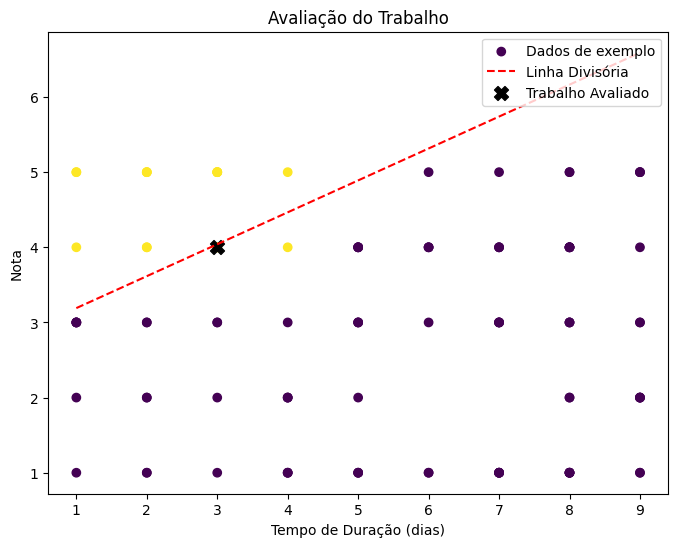

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def treinar_modelo():
    # Gerar dados de exemplo
    np.random.seed(42)
    dias = np.random.randint(1, 10, 100)  # Tempo de duração em dias
    notas = np.random.randint(1, 6, 100)   # Nota de 1 a 5

    # Definir uma métrica fictícia para determinar se o trabalho foi bom (apenas para fins de exemplo)
    resultados = np.where((dias < 5) & (notas > 3), 1, 0)

    # Dividir os dados em conjunto de treinamento e teste
    X = np.column_stack((dias, notas))
    y = resultados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinar o modelo de Regressão Logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    return model, X, y

def avaliar_trabalho(model, tempo_duracao, nota):
    # Fazer previsões para o trabalho fornecido
    resultado = model.predict([[tempo_duracao, nota]])

    if resultado == 1:
        print("O trabalho foi considerado bom.")
    else:
        print("O trabalho não foi considerado bom.")

# Treinar o modelo e obter os dados
modelo_treinado, dados_X, dados_y = treinar_modelo()

# Avaliar um trabalho específico (substitua os valores abaixo pelos desejados)
tempo_duracao_trabalho = 3
nota_trabalho = 4
avaliar_trabalho(modelo_treinado, tempo_duracao_trabalho, nota_trabalho)

# Criar um gráfico para visualizar a distribuição dos dados
plt.figure(figsize=(8, 6))

# Plotar pontos de dados
plt.scatter(dados_X[:, 0], dados_X[:, 1], c=dados_y, cmap='viridis', label='Dados de exemplo')

# Adicionar uma linha divisória ao gráfico
slope = -modelo_treinado.coef_[0, 0] / modelo_treinado.coef_[0, 1]
intercept = -modelo_treinado.intercept_ / modelo_treinado.coef_[0, 1]
x_line = np.linspace(dados_X[:, 0].min(), dados_X[:, 0].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linha Divisória')

# Marcar o ponto correspondente ao trabalho avaliado
plt.scatter(tempo_duracao_trabalho, nota_trabalho, color='black', marker='X', s=100, label='Trabalho Avaliado')

# Configurar rótulos e título
plt.xlabel('Tempo de Duração (dias)')
plt.ylabel('Nota')
plt.title('Avaliação do Trabalho')

# Adicionar uma legenda
plt.legend(loc='upper right')

# Mostrar o gráfico
plt.show()
